Tikamgarh


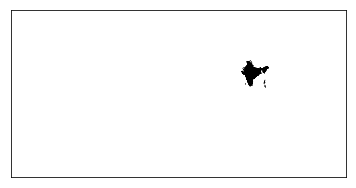

In [1]:
%matplotlib inline
from matplotlib.mlab import prctile_rank
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import numpy as np
import sys
sys.path.append('..')
from pickle_fns import *
file="D:\AI-ML\census\IND_adm\IND_adm2"
map= Basemap()
shp_info=map.readshapefile(file, 'IND_adm2')
for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
    if(info['NAME_2']=='Tikamgarh'):
        print(info['NAME_2'])
        x, y = zip(*lightning) 
        break
coords=np.array(lightning)

lonpt, latpt = map(coords[:,0],coords[:,1],inverse=True)
# divfac=10

In [4]:
lllon,urlon,lllat,urlat,px,py

(78.25,
 79.5,
 24.25,
 25.75,
 array([  58847.4316483 ,   47224.02252679,   64869.70017584,
          61823.60022354,   69378.34143478,   61942.27623217,
          49485.52579089,   51707.09777306,   96827.73172746,
          81533.71788697,   72529.99056655,   60474.95001912,
          74570.29312109,  100352.29434876,   87684.83509464,
          79984.1515809 ,   52207.8101902 ,   66302.95762037]),
 array([ 129830.81967546,  120648.96924066,  144958.75016415,
         140166.00359215,  127001.80061514,  125984.10856798,
         135821.94810193,  127723.88536235,   88478.39769942,
          99815.99426883,  114109.14270807,   99573.49966033,
          97779.28188067,   96615.23961938,   83842.9283665 ,
          46374.4367626 ,   60883.59982134,   55116.98334339]))

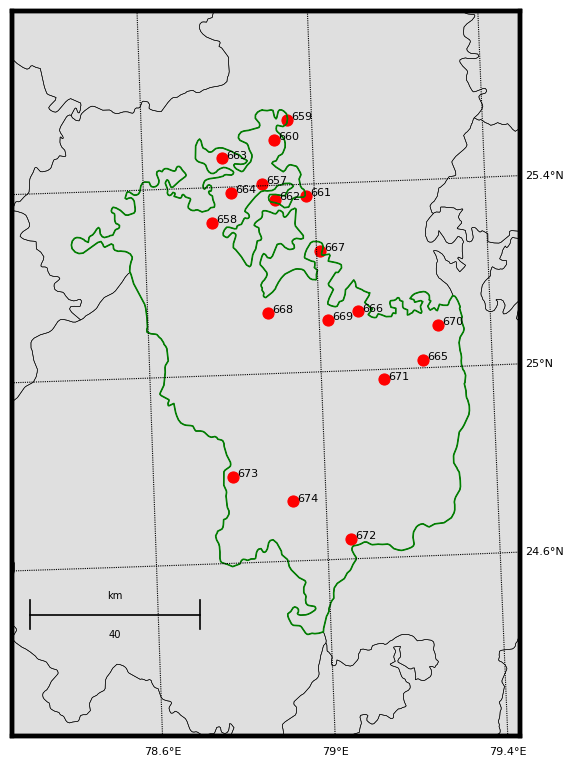

In [2]:
vesdf,data_dfs=load_pkl('tikamgarh.pkl')
labels=['Block', 'Date', 'Direction of Schlumberger Array', 'Distt',  
               'Geology','Location', 'RL', 'VES No.', 'Water Table']
d4plots=vesdf['VES No.'].values
E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
divfac=4
lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac


fig=plt.figure(figsize=(12,12),dpi=80, facecolor='w', edgecolor='k')
map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24379)
shp_info=map.readshapefile(file, 'IND_adm2')
ix,iy=map(x, y)
map.plot(ix, iy, marker=None,color='g')
No = len(coords[:,0])
area = 4 * np.ones(No)
# polyx,polyy=map(coords[:,0],coords[:,1])
# plt.scatter(polyx,polyy, s=area, marker='.',color='lightgreen')
px,py=map(E,N)


# lon = urlon-0.6
# lat = urlat-0.6
# x1,y1 = map(lon, lat)
# x2, y2 = map(lon+0.5,lat+0.5)

# plt.arrow(x1,y1,x1,y2,fc="k", ec="k", linewidth = 4, head_width=1000, head_length=1000)
# map.drawmapboundary()
map.drawmapscale(78.50, 24.5, 0, 0, 40)

parallels =np.arange(24.2, 25.8,0.4)
map.drawparallels(parallels,labels=[False,True,True,False])
meridians =  np.arange(78.2, 79.6,0.4)
map.drawmeridians(meridians,labels=[True,False,False,True])

map.drawmapboundary(fill_color='#dFdFdF',linewidth=4.0)
plt.scatter(px,py,s=100, marker='o',c='r')
for i, txt in enumerate(d4plots):
        plt.annotate(txt, (px[i]+1000, py[i]+100))
plt.show()
# fig.savefig('map-ves.png')
